In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics.pairwise import euclidean_distances


In [0]:
def plot_clusters(points, cluster_labels, show_annotation=True,offset=0.05):
  points=np.array(points)
  cluster_labels=np.array(cluster_labels)
  unique_cluster=np.unique(cluster_labels)
  for cluster in unique_cluster:
    plt.scatter(points[cluster_labels==cluster,0],points[cluster_labels==cluster,1],label=cluster)
  if show_annotation:
    for i in range(len(points)):
      plt.annotate(i,(points[i][0]+offset,points[i][1]+offset))
  plt.legend()

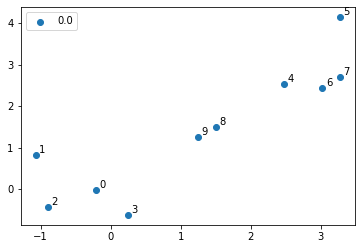

In [19]:
np.random.seed(2)
points=np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points=np.vstack((points,np.array([[1.5,1.5]])))
points=np.vstack((points,np.array([[1.25,1.25]])))

plot_clusters(points,np.zeros(10))

In [0]:
def initialize(points,k):
  cluster_points = random.sample(range(len(points)), k)
  cluster_centers = []
  for i in cluster_points:
    cluster_centers.append([points[i][0],points[i][1]])
  return np.array(cluster_centers)


In [0]:
def assign(point,cluster_centres):
  distances=euclidean_distances(points,cluster_centres)
  return np.argmin(distances,axis=1)


In [0]:
def recalculate_cluster_centers(points,cluster_labels,K):
  points=np.array(points)
  cluster_labels=np.array(cluster_labels)
  unique_labels=np.unique(cluster_labels)
  cluster_centers = []
  for i in range(K):
    if i in unique_labels:
      cluster_centers.append(np.average(points[cluster_labels==i,:],axis=0))
    else:
      cluster_centers.append(np.array([0,0]))
  return np.array(cluster_centers)

In [0]:
def Kmeans(points,k):
  cluster_labels=np.zeros(points.shape[0])
  cluster_centers=initialize(points,k)
  initial_cluster_centers=cluster_centers.copy()
  prev_cluster_centers=np.zeros(cluster_centers.shape)
  while not (prev_cluster_centers==cluster_centers).all():
    prev_cluster_centers=cluster_centers.copy()
    cluster_labels=assign(points,cluster_centers)
    cluster_centers=recalculate_cluster_centers(points,cluster_labels,k)
  return initial_cluster_centers, cluster_centers, cluster_labels

In [24]:
np.random.seed(2)
cluster_centers = np.array([[0,0], [1,1], [2,2]])
cluster_labels = assign(points, cluster_centers)
cluster_labels

array([0, 0, 0, 0, 2, 2, 2, 2, 1, 1])

In [25]:
recalculate_cluster_centers(points,cluster_labels,3)

array([[-0.48043851, -0.06287893],
       [ 1.375     ,  1.375     ],
       [ 3.00926244,  2.95863941]])

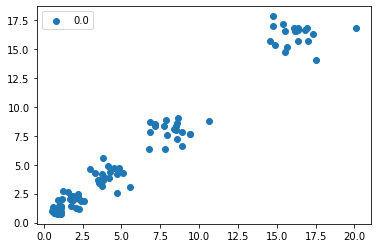

In [48]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

 

points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

[[1.74612828 2.2033585 ]
 [0.93622022 1.96341895]
 [7.15136077 8.47333322]
 [7.18286822 8.34591656]
 [3.72279679 4.2105331 ]]


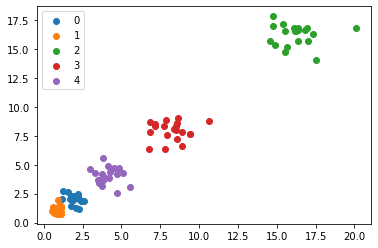

In [27]:
initial_cluster_centers, cluster_centers, cluster_labels =Kmeans(points,5)
plot_clusters(points,cluster_labels,show_annotation=False)

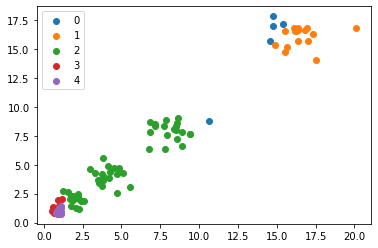

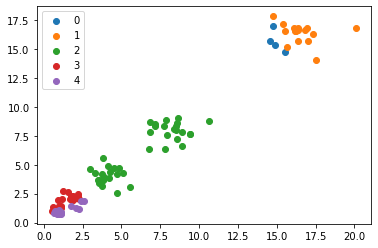

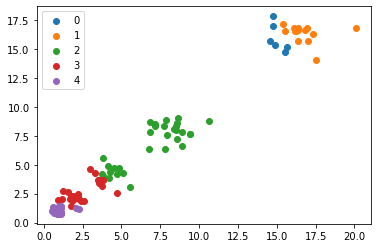

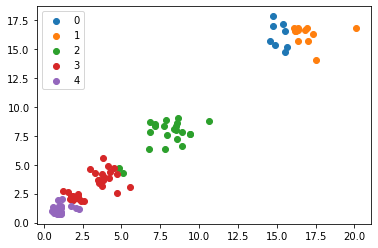

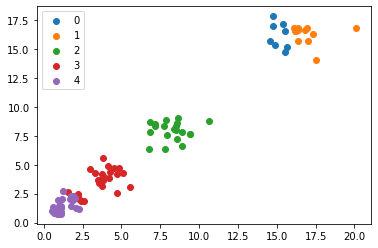

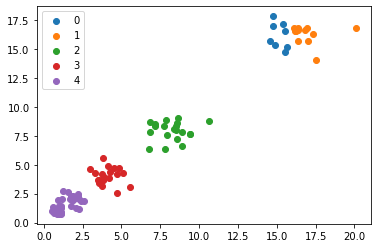

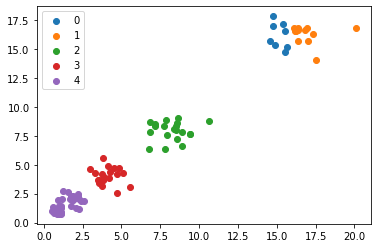

In [51]:
#task 1 
k=5
cluster_labels=np.zeros(points.shape[0])
cluster_centers=initialize(points,k)
initial_cluster_centers=cluster_centers.copy()
prev_cluster_centers=np.zeros(cluster_centers.shape)
while not (prev_cluster_centers==cluster_centers).all():
  prev_cluster_centers=cluster_centers.copy()
  cluster_labels=assign(points,cluster_centers)
  cluster_centers=recalculate_cluster_centers(points,cluster_labels,k)
  plot_clusters(points,cluster_labels,show_annotation=False)
  plt.show()

In [0]:
from sklearn.datasets import make_circles

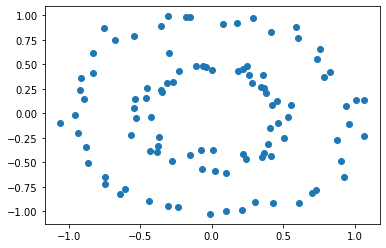

In [29]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
plt.scatter(points[:,0], points[:,1])

[[ 0.61073381 -0.91907152]
 [-0.43044215 -0.38316539]]


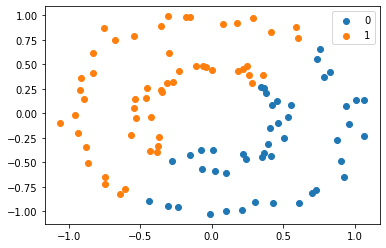

In [30]:
initial_cluster_centers, cluster_centers, cluster_labels =Kmeans(points,2)
plot_clusters(points,cluster_labels,show_annotation=False)

(100,)
(100,)


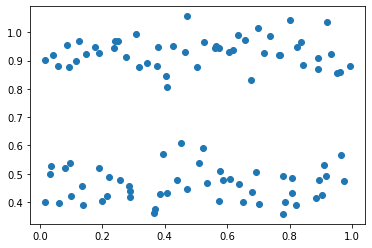

[[0.77924771 0.49348929]
 [0.89236952 0.90903925]]


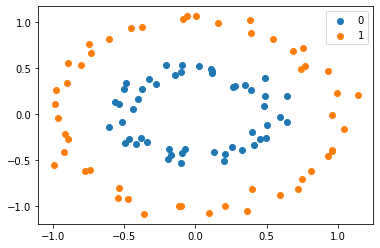

In [47]:
#task 2
points, _ = make_circles(100, noise=0.06, factor=0.5)
oldpoints=points
K=2
r = np.sqrt(points[:,0]**2+points[:,1]**2)
t = np.arctan2(points[:,1],points[:,0])
print(r.shape)
print(t.shape)
newpoints=np.zeros((points.shape[0],2))
for i in range(points.shape[0]):
  newpoints[i][1]=float(r[i]/1.1)
  newpoints[i][0]=float((-t[i]+np.pi)/(2*np.pi))
points=newpoints
plt.scatter(points[:,0], points[:,1])
plt.show()
initial_cluster_centers, cluster_centers, cluster_labels =Kmeans(points,2)
plot_clusters(oldpoints,cluster_labels,show_annotation=False)


[[ 6  7]
 [ 6  4]
 [26 18]]


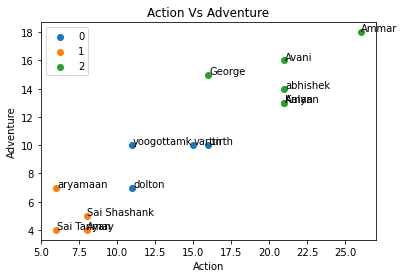

In [87]:
#task3
import json,os
data=[]
X=[]
Y=[]
points = []
names=[]
count=0
for i in os.listdir("/content"):
  if(i[0:5]=='final'):
    f=open(i,"r")
    data.append(json.loads(f.read()))
    X.append(data[count]['genre_freq']['Action'])
    Y.append(data[count]['genre_freq']['Adventure'])
    points.append([X[count],Y[count]])
    names.append(data[count]['username'])
    f.close()
    count+=1
points = np.array(points)
K=3
initial_centers, cluster_centers, cluster_labels = Kmeans(points, K)
for i in range(points.shape[0]):
  plt.annotate(names[i],(points[i,0]+0.05,points[i,1]+0.05))  
plt.title("Action Vs Adventure")
plt.xlabel("Action")
plt.ylabel("Adventure")
plot_clusters(points, cluster_labels, show_annotation=False)